# Engineering Socio-Technical Systems

Congratulations! You have been selected as a social architect to design a new incentive system to improve the quality of the system, lifes and so on. 


Your goal might include: 
- Preventing or decreasing the number of freeriders in the system 
- Incentivizing cooperation between different groups 
- Improving the quality of the system, increase number of available resources.
- Make the system more fair. 

For each of your goal you need to define the metrics and design a ranking function that takes these metrics into account.


## Applications and Use Cases 

1. Peer-to-peer resource sharing. The agent question is: who must I serve the first? 
When there is no competition and the resource can be provided easily - share it any peer. 
If there are multiple peers and they cannot be served without a loss in quality - the agent must decide who to serve.
   + Option 1: serve the agent with best indirect reciprocity potential. Estimate the social capital of the peer and the price of payment for the requested resources. *How much can I get If I will have a edge with you?* Agents try to maximize the value of their useful social capital.
   + Option 2: Increase own potential and attractiveness. Serve to pay off with direct reciprocity. This will significantly imporve the "credit score" of the node. Agents try to minimize the credit risk and improve their score. 
2. Federated ml .
Improve the quality of the model by sharing the model with other peers and estimating the quality of each other. 
3. File/Content sharing network. 
Peers anounce IWANT and IHAVE blocks to the network. The nodes later naturally cluster each other to optimize the exchange of the blocks. 


## The building blocks

Here are the main building blocks used:
 - Agents interact, exchange information and make decisions. Agents estimate each other's trustworthiness, performance and make decisions based on this information.
 - We assume an *accounting mechansim*: it guarantees discovery and convergence of information. The accounting mechanism acts as a ledger that records all interactions in the system. The authecthicity of interation can be verified via cryptographic signatures. The interaction weight is self-reported by the participants.
 - The ledger data is used to build the interaction graph: a directed weighted graph of agents interactions. An edge is an instance of interaction, or opinion, or trust relationship. 
 - The work graph is kept updated with every new iteration. Agents Each new iteration updates or changes the value of the interaction. For example, they might change their opinion. 

As an architect your goal is to design a ranking function and organize a trust market. 







# Understanding the Semantics and Choosing Parameters

To choose the parameters and build a robust and informative reputation algorithm, we need to understand the semantics of the interaction and the work/trust graph.

*Can we estimate the relative value trust connection? What about value of the nodes?*

- Is the trust transitive or not? 
- How important is the direct reciprocity?

The answer to that question depends on the system goals. 




**Case 1**. Direct connections are valued more than indirect connections.

In a extreme case, the node interacts and estimates their direct connections, for example: "Tit-for-tat".

Otherwise the indirect connections are values with respect to the direct connections.

**Case 2**. Indirect connections are more/or as valuable as direct connections.

In this case the nodes can create new connections to abuse and manipulate the system. 




# Toy example graphs

To better show different aspects and understand which parameters are important, we will use toy example.

After answering all the below questions, you can design a reasonable reputation/trust function.

In [309]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_nx(G, figsize=(5,5), subtitle=None):
    pos = nx.kamada_kawai_layout(G)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    if subtitle:
        fig.suptitle(subtitle, fontweight ="bold")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    nx.draw_networkx(G, with_labels=True, 
        connectionstyle='arc3, rad = 0.1',
        node_size=500, 
        label=15, 
        pos=pos,
        node_shape='o',
        width=1.5)
    edgeLabels = nx.get_edge_attributes(G,'weight')
    edgeLabels = {x:int(d) for x,d in edgeLabels.items()}
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edgeLabels, label_pos=0.2, font_size=10);

def pretty_draw(G, subtitle=None):
    widths = nx.get_edge_attributes(G, 'weight')
    fig = plt.figure(dpi=150, figsize=(6,3))
    if subtitle:
            fig.suptitle(subtitle, fontweight ="bold")

    node_size = 200
    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos, 
        node_size=node_size, node_color='#3182bd', linewidths=1, alpha=0.9)

    nx.draw_networkx_edges(G, pos,
                        edgelist = widths.keys(),
                        width=list(widths.values()),
                        edge_color='#0C0C0C',
                        connectionstyle='arc3, rad = 0.1',
                        alpha=0.5)

    nx.draw_networkx_labels(G, pos=pos,
                            labels=dict(zip(G.nodes(),G.nodes())),
                            font_color='white',
                            font_size=10)

    edgeLabels = nx.get_edge_attributes(G,'weight')
    edgeLabels = {x:int(d) for x,d in edgeLabels.items()}
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edgeLabels, label_pos=0.15, font_size=8);

    plt.box(False)
    plt.show()
    


## The evolution of scores

Let's consider a very basic example to understand the evolution of the scores.

### Interation 1

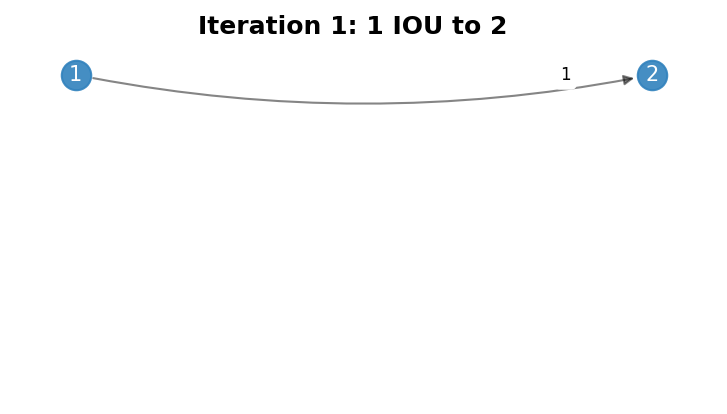

In [310]:
G1 = nx.DiGraph()
G1.add_edge(1,2, weight=1)
pretty_draw(G1, subtitle='Iteration 1: 1 IOU to 2')

Let's view the trust graph from an eagle eye view. 

To understand it better consider trust network as a special form of a credit network. 
Each edge is a IOU (I owe you) relationship between nodes.

For interation 1 we create the following conditions: 
- As a result of IOU the node 1 is ranked lower than node 2


In [208]:
# Score of 1 is higher than 2
gt_g1 = lambda score: score(G1, 1) < score(G1, 2)

### Iteration 2

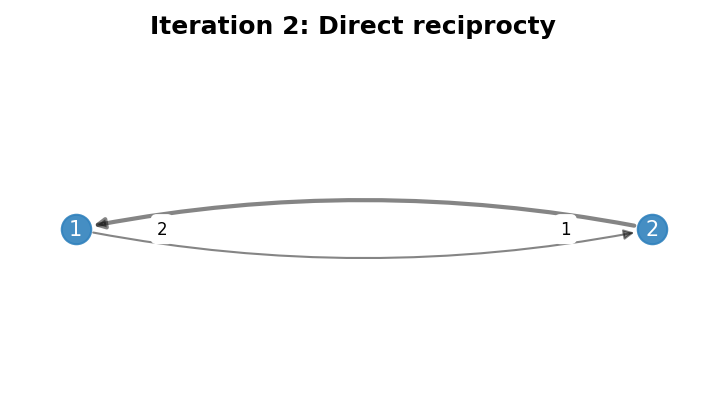

In [311]:
# Interation 2: Direct reciprocity from node 1 - node serves the node 2 

G2 = G1.copy()
G2.add_edge(2,1, weight=2)

pretty_draw(G2, subtitle='Iteration 2: Direct reciprocty')

Node 1 has payed the debt and even x2 of the debt.

In [210]:
# Score of 1 has increased 
# Score of 2 has decreased

# Score of 1 is higher than 2? 

gt_g2 = lambda score:  score(G2, 1) > score(G1, 1) and \
               score(G2, 2) < score(G1, 2) and score(G2, 1) >= score(G2, 2)

### Iteration 3

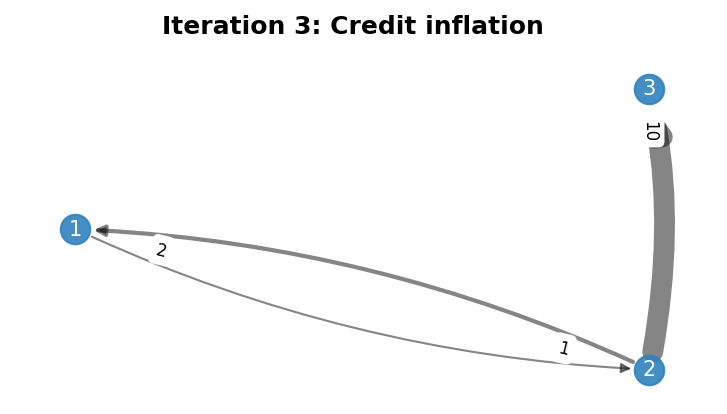

In [312]:
# Interation 3: Direct reciprocity from node 1 - node serves the node 2 

G3 = G2.copy()
G3.add_edge(2,3, weight=10)

pretty_draw(G3, subtitle='Iteration 3: Credit inflation')

In [212]:
# Node 2 score goes down 
# Node 1 score goes down? Yes, Same, No
# Node 3 score is higher than 2? 1? 

gt_g3 = lambda score: score(G3, 2) < score(G2, 2) and \
               score(G3, 1) < score(G2, 1) 
               

### Interation 4

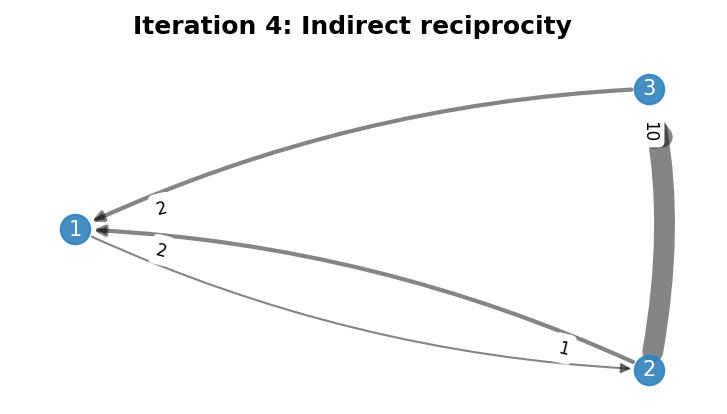

In [314]:
# Interation 3: Indirect reciprocity 

G4 = G3.copy()
G4.add_edge(3,1, weight=2)

pretty_draw(G4, subtitle='Iteration 4: Indirect reciprocity')

In [ ]:
# Node 3 score down, 
# Node 1 score up 
# Node 2 score up? 
gt_g4 = lambda score: score(G4, 3) < score(G3, 3) and \
               score(G3, 1) < score(G2, 1) 

## "Who is better" graph examples

### Importance of Quantity: Received

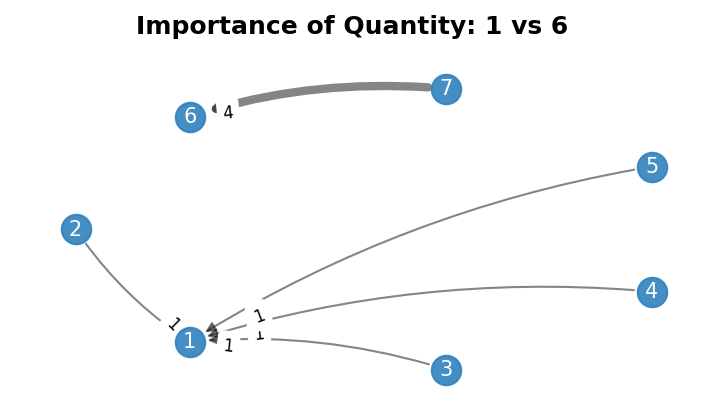

In [315]:
H1 = nx.DiGraph()
H1.add_edge(2,1, weight=1)
H1.add_edge(3,1, weight=1)
H1.add_edge(4,1, weight=1)
H1.add_edge(5,1, weight=1)

H1.add_edge(7,6, weight=4)

pretty_draw(H1, subtitle='Importance of Quantity: 1 vs 6')

In [224]:
# Score for 1 is equal to 6? 
ht_1 = lambda score: score(H1, 1) == score(H1, 6)

(3.9702970297029703, 3.9702970297029703)

### Importance of Quality: Spend

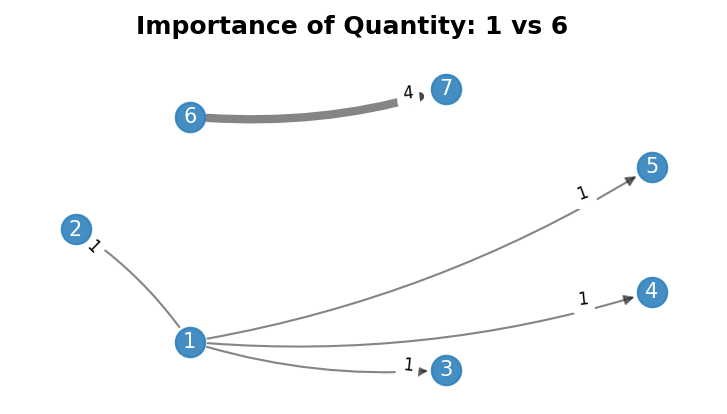

In [316]:
H2 = nx.reverse(H1)

pretty_draw(H2, subtitle='Importance of Quantity: 1 vs 6')

In [318]:
# Score for 1 is equal to 6? 
ht_2 = lambda score: score(H2, 1) == score(H2, 6)

### Direct vs Indirect Reciprocity

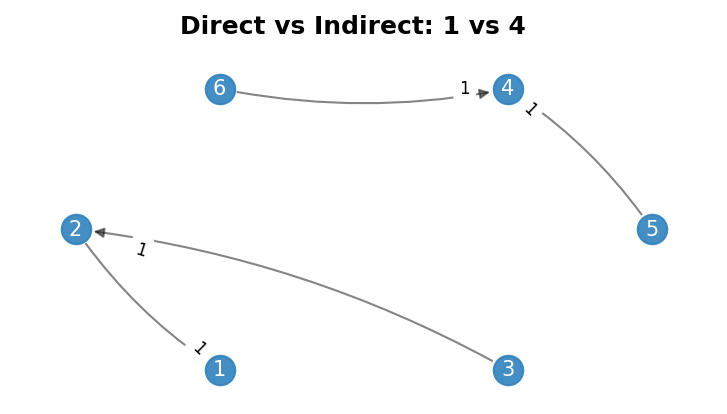

In [317]:
H3 = nx.DiGraph()

H3.add_edge(2,1, weight=1)
H3.add_edge(3,2, weight=1)

H3.add_edge(5,4, weight=1)
H3.add_edge(6,4, weight=1)

pretty_draw(H3, subtitle='Direct vs Indirect: 1 vs 4')


In [320]:
ht_3 = lambda score: score(H3, 1) == score(H3, 6)